In [1]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.expand_frame_repr", False)


In [3]:
df = pd.read_csv('game_product_data.csv')

In [4]:
print(df.head())

   listing_id  product_id  sku_id  retailer_id  points  geography_id  publisher_id  industry_id  importance release_date  lifecycle  current_age_months  remaining_lifecycle_months
0      529407        3829   33998         1243       0            78             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
1      529559        3831   27559         1243       0            78             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
2      529676        3831   27559         1246       0            89             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
3      529681        3830   27384         1246       0            89             3            1         1.0   2021-10-01       18.0                22.0                        -4.0
4      529707        1030   14621         1246       0            89             1            1     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415962 entries, 0 to 415961
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   listing_id                  415962 non-null  int64  
 1   product_id                  415962 non-null  int64  
 2   sku_id                      415962 non-null  int64  
 3   retailer_id                 415962 non-null  int64  
 4   points                      415962 non-null  int64  
 5   geography_id                415962 non-null  int64  
 6   publisher_id                415962 non-null  int64  
 7   industry_id                 415962 non-null  int64  
 8   importance                  413648 non-null  float64
 9   release_date                415962 non-null  object 
 10  lifecycle                   405553 non-null  float64
 11  current_age_months          415962 non-null  float64
 12  remaining_lifecycle_months  405553 non-null  float64
dtypes: float64(4),

In [6]:
df.describe()

,listing_id,product_id,sku_id,retailer_id,points,geography_id,publisher_id,industry_id,importance,lifecycle,current_age_months,remaining_lifecycle_months
count,415962.000000,415962.000000,415962.000000,415962.000000,415962.000000,415962.000000,415962.000000,415962.0,413648.000000,405553.000000,415962.000000,405553.000000
mean,510763.969089,4355.439485,33530.448440,466.194840,15.107945,40.995127,95.577995,1.0,2.213592,38.664542,23.364014,15.338619
std,211720.248501,2881.869798,17678.292116,368.505244,24.051004,22.540840,164.455692,0.0,1.012643,57.158309,15.709915,55.917437
min,359.000000,4.000000,24.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,-16.000000,-26.000000
25%,367200.250000,1336.000000,19219.000000,201.000000,2.000000,22.000000,6.000000,1.0,1.000000,24.000000,13.000000,4.000000
50%,521276.500000,4513.000000,33389.000000,355.000000,4.000000,46.000000,19.000000,1.0,2.000000,36.000000,22.000000,13.000000
75%,684300.750000,6743.000000,46453.500000,696.000000,24.000000,63.000000,71.000000,1.0,3.000000,48.000000,29.000000,25.000000
max,868719.000000,10680.000000,75005.000000,1558.000000,120.000000,89.000000,960.000000,1.0,5.000000,9056.000000,121.000000,9039.000000


In [7]:
df = df.dropna()

In [8]:
df.drop(columns='release_date', inplace = True)

In [9]:
grouped_df = df.groupby('publisher_id').agg({
    'sku_id': 'nunique',
    'product_id': 'nunique',
    'retailer_id': 'nunique',
    'points': ['sum', 'mean'],  
    'importance': lambda x: x.mode().iloc[0],
    'remaining_lifecycle_months': 'mean',
    'geography_id': 'nunique',
    'publisher_id': 'size'
 })

In [10]:
print(grouped_df.head())

              sku_id product_id retailer_id  points            importance remaining_lifecycle_months geography_id publisher_id
             nunique    nunique     nunique     sum       mean   <lambda>                       mean      nunique         size
publisher_id                                                                                                                  
1               1298         50         930  257739  12.520719        2.0                  22.383483           77        20585
2               1620         60        1014  299713  12.419733        1.0                  20.702511           79        24132
3               1764        110         983  401275  14.062062        1.0                   7.693405           79        28536
4               1542         69         913  327091  14.462814        1.0                   4.615715           78        22616
5                261         26         597   50087  14.792380        2.0                  19.500295           

In [15]:
from sklearn.datasets import make_blobs, make_circles, make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from pyclustertend import hopkins
from sklearn.metrics import silhouette_score

import datetime
import warnings

In [12]:
scaled_df = StandardScaler().fit_transform(grouped_df)

In [13]:
scaled_df.shape

(515, 9)

In [16]:
from pyclustertend import hopkins 
hopkins(scaled_df,515)

0.0545294401821716

In [17]:
from sklearn.cluster import KMeans

## Check which number of clusters works best 
n_cluster_list = [2,3,4,5,8,10,20,50,100,500] # there can't be more clusters than n

elb = []
silhouette = []
for n_clusters in n_cluster_list:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42, n_init = 10)
   cluster_labels = clusterer.fit_predict(scaled_df)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(scaled_df, cluster_labels)
   silhouette.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elb.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center/within-cluster sum of squares

For n_clusters = 2 The average silhouette_score is : 0.7377670548193693
For n_clusters = 3 The average silhouette_score is : 0.2584638608539313
For n_clusters = 4 The average silhouette_score is : 0.38309748501627267
For n_clusters = 5 The average silhouette_score is : 0.3017251683002023
For n_clusters = 8 The average silhouette_score is : 0.30086059704458973
For n_clusters = 10 The average silhouette_score is : 0.27093655924566845
For n_clusters = 20 The average silhouette_score is : 0.2761513829055881
For n_clusters = 50 The average silhouette_score is : 0.3170575189425214
For n_clusters = 100 The average silhouette_score is : 0.3218063814906548
For n_clusters = 500 The average silhouette_score is : 0.04850772080338254


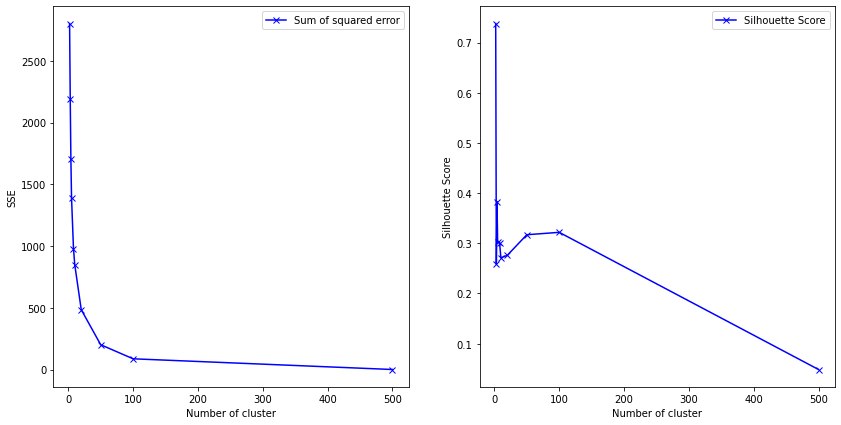

In [18]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(n_cluster_list, elb,'bx-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(n_cluster_list, silhouette,'bx-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [20]:
kmeans = KMeans(3, random_state = 42).fit(scaled_df)

grouped_df['Cluster'] = kmeans.predict(scaled_df)
grouped_df.head()

/Users/kaijones/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


sku_id product_id retailer_id  points            importance remaining_lifecycle_months geography_id publisher_id Cluster
             nunique    nunique     nunique     sum       mean   <lambda>                       mean      nunique         size        
publisher_id                                                                                                                          
1               1298         50         930  257739  12.520719        2.0                  22.383483           77        20585       1
2               1620         60        1014  299713  12.419733        1.0                  20.702511           79        24132       1
3               1764        110         983  401275  14.062062        1.0                   7.693405           79        28536       1
4               1542         69         913  327091  14.462814        1.0                   4.615715           78        22616       1
5                261         26         597   50087  14.792380        2.0                  19.500295           73         3386       2

In [21]:
cluster_0 = grouped_df[grouped_df['Cluster'] == 0].reset_index()
cluster_1 = grouped_df[grouped_df['Cluster'] == 1].reset_index()
cluster_2 = grouped_df[grouped_df['Cluster'] == 2].reset_index()



In [22]:
print(cluster_1.publisher_id)

          size
0     1  20585
1     2  24132
2     3  28536
3     4  22616
4     6  14464
5     8  13789
6    11  20138
7    15  17391
8    19  28790
9    20  18198
10   22   8474
11   27   7496
12   36  10046
13   71   9068
14  234   5781
15  273   5702


In [23]:
cluster_0.publisher_id

,,size
0,28,3
1,40,15
2,46,128
3,51,17
4,55,3
...,...,...
237,956,2
238,957,1
239,958,1
240,959,1


In [24]:
cluster_2.publisher_id

,,size
0,5,3386
1,7,1608
2,10,4233
3,12,7003
4,14,895
...,...,...
252,858,41
253,859,155
254,860,40
255,861,39
